<a href="https://colab.research.google.com/github/bmreiniger/datascience.stackexchange/blob/master/57604.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

X = np.array([[1, 1],[5**0.5, -5**0.5]])
y = np.array([3,-5**0.5])

In [0]:
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
import itertools

delta = 0.01
xrange = np.arange(-1, 2.5, delta)
yrange = np.arange(-1, 2.5, delta)
xs, ys = np.meshgrid(xrange,yrange)

def loss(a,b):
  """Unregularized loss, that is."""
  return np.linalg.norm(y.T-X@(np.array([a,b]).T))


def plot_reg(reg_alpha, reg_lambda):
  alpha = reg_alpha+reg_lambda
  l1_ratio = reg_alpha/(reg_alpha+reg_lambda) if alpha > 0 else 0
  model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=False)
  model.fit(X,y)
  print(model.coef_.round(8))
  ah, bh = model.coef_
  opt_loss = loss(*model.coef_)
  
  plt.contour(xs, ys, np.array([[loss(a,b) for a in xrange] for b in yrange]), [opt_loss])
  plt.plot([1],[2], '+')
  plt.contourf(xs, ys, l1_ratio*(abs(xs)+abs(ys))+(1-l1_ratio)*(xs**2+ys**2), 
                    [0,l1_ratio*(abs(ah)+abs(bh))+(1-l1_ratio)*(ah**2+bh**2)])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


[0.9999208 1.9999472]


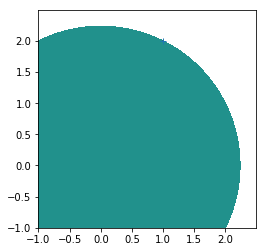

In [3]:
plot_reg(0,0)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.999999999999998, tolerance: 0.0014
  positive)


[0.  0.5]


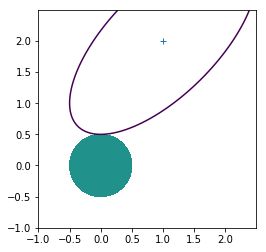

In [4]:
plot_reg(0,5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.757575757575756, tolerance: 0.0014
  positive)


[-0.03030303  0.3030303 ]


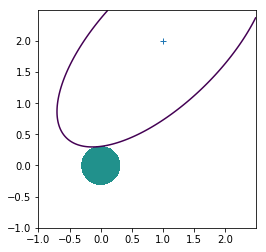

In [5]:
plot_reg(0,10)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6666666666666665, tolerance: 0.0014
  positive)


[0.33333333 1.16666667]


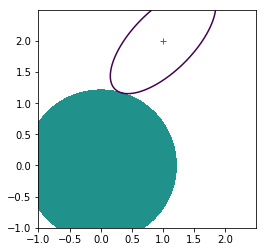

In [6]:
plot_reg(0,1)

[0. 1.]


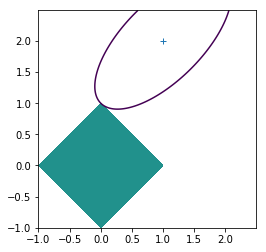

In [7]:
plot_reg(1,0)

[0.         0.66666667]


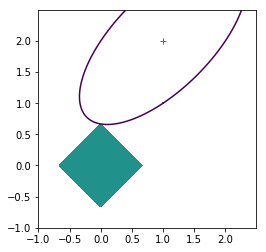

In [8]:
plot_reg(2,0)

[0.4999109 1.4999406]


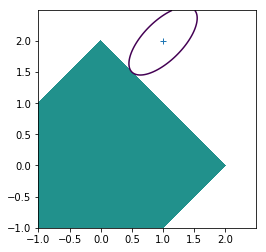

In [9]:
plot_reg(0.5,0)

[0.  0.6]


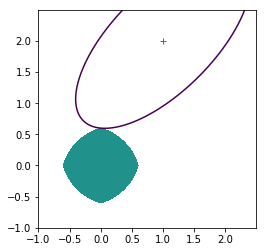

In [10]:
plot_reg(1,2)